앞서 람다계산법의 문법구조(그림 \ref{fig:ChurchDeBruijn})를 소개하며
수학에서 보통 $f(x)=e$ 형태로 정의되는 함수를 람다식으로는 이름을 붙이지 않고
$\lambda x.e$ 형태의 함수요약(function abstraction)식으로 표현한다고 설명했다.
여기서는 $e_1~e_2$ 형태의 함수적용(function application)식을 포함한
람다계산법의 의미구조(그림 \ref{fig:UTLC})를 정리해 보자. 의미구조를
자세히 실펴보기 앞서 먼저 함수적용식 $e_1~e_2$의 의미를 간단히 이야기하자면,
수학에서 일반적인 표기로는 $e_1(e_2)$를 뜻한다. 즉, 함수 $f$에 인자 $v$를 넘겨
계산한 값을 나타내는 $f(v)$를 람다식으로는 괄호를 쓸 필요 없이 $f~v$로
표현할 수 있다는 말이다.

그렇다면 람다계산법에서 함수를 인자에 적용해 계산한다는 의미는 구체적으로
무엇일까? 함수적용식의 왼쪽이 명백한 함수의 형태, 즉 함수요약식일 때
함수 적용 계산 과정의 가장 핵심적인  단계를 진행할 수 있다.
즉 $(\lambda x. e)\;e_2$ 형태일 때 함수의 파라메터인 $x$에 인자 $e_2$를
넘겨 계산을 한 단계 더 진행하면 $\{x{\mapsto}e_2\}e$로 표시되는,
$e$에 자유롭게 나타나는 $x$를 $e_2$로 납치없이 바꿔친 식을 얻는다.
즉, $(\lambda x. e)\;e_2 \longmapsto \{x{\mapsto}e_2\}e$가 바로
함수 적용의 계산과정 중 가장 핵심적인 단계를 나타내는 규칙($\beta$)으로
그림 \ref{fig:UTLC}에 정리된 작은걸음 의미구조의 규칙들 중 중 가장
처음으로 나타나 있다. 이렇게 $\beta$규칙을 적용해 나감으로써
계산을 진행하는 과정을 \`$\beta$줄이기' 혹은 \`$\beta$줄임'($\beta$-reduction)이라고
하며, $\beta$규칙을 적용할 수 있는 $(\lambda x. e)\;e_2$ 형태의 식을
$\beta$규칙으로 줄어드는 식($\beta$-reducible expression)의
줄임말인 \`$\beta$줄식'($\beta$-redex)이라 부른다.
마찬가지로 그 다음에 나타나는 $\eta$규칙의 경우에도 \`$\eta$줄임'($\eta$-reduction)과
\`$\eta$줄식'($\eta$-redex)의 개념을 생각해 볼 수 있다. 당분간은 $\eta$ 규칙은
없이 나머지 규칙($\beta$,$\lambda$,$\textrm{@}_1$,$\textrm{@}_2$)만 있다고 생각하자.

\begin{align*}
e ::=~& x           & {\scriptsize\textrm{name}} \\
 \mid~& \lambda x.e & {\scriptsize\textrm{abstraction}} \\
 \mid~& e~e         & {\scriptsize\textrm{application}}
\end{align*}

$$
{\scriptstyle(\beta)}\frac{}{
~~(\lambda x.e)\;e_2 \longmapsto \{x{\mapsto}e_2\}e~~}
\qquad\qquad
{\scriptstyle(\eta)}\frac{}{
~~\lambda x.e\;x \longmapsto e~~}
({\scriptstyle x\,\notin\mathrm{fv}(e) })
$$
$$
{\scriptstyle(\lambda)}\frac{e\longmapsto e'}{
~~\lambda x.e \longmapsto \lambda x.e'~~}
\qquad
{\scriptstyle(\textrm{@}_1)}\frac{e_1\longmapsto e_1'}{
~~e_1\;e_2 \longmapsto e_1'\;e_2~~}
\quad
{\scriptstyle(\textrm{@}_2)}\frac{e_2\longmapsto e_2'}{
~~e_1\;e_2 \longmapsto e_1\;e_2'~~}
$$

방금 설명한 $\beta$규칙과 같은 계산이 하스켈 언어에서도 이루어지고 있음을 확인해 보자.
우선 이 책에서 실습용으로 작성하는 하스켈 노트북의 첫 셀은 항상 다음과 같이 시작한다.\footnote{%
불필요한 코딩 스타일 제안 메시지를 끄고 필요한 컴파일러 언어 기능 설정을 하는 내용으로,
세부사항은 책의 내용을 이해하는 데 큰 관계가 없으니 이해하려 하지 않고 넘어가도 좋다.}

In [1]:
:opt no-lint                          -- linter 끄기
{-# LANGUAGE ScopedTypeVariables #-} -- 추가 언어 기능 설정

하스켈 코드에서는 $\lambda x.e$와 같은 람다식을 `\x -> e`와 같이 표현한다.
아래와 같이 람다식으로 표현된 함수를 같이 인자에 적용해 보면
함수 몸체 $e$에 나타나는 자유로운 $x$를 넘겨받은 인자로 바꿔치기하며 $\beta$줄임처럼 계산됨을 관찰할 수 있다.

In [2]:
(\x -> [x,x,x]) 7

[7,7,7]

In [3]:
(\x -> [x,x,x]) "go"

["go","go","go"]

참고로 다음과 같이 하나의 셀에 여러 개의 식을 여러 줄에 걸쳐 작성하면
각각의 식을 실행한 결과를 출력한다.

In [4]:
(\x -> [x,x,x]) 7
(\x -> [x,x,x]) "go"

[7,7,7]

["go","go","go"]

\vspace*{1ex}

람다식의 의미구조(그림 \ref{fig:UTLC})에서 $\beta$규칙과 같이
계산 진행 단계의 핵심적인 내용을 표현하는 규칙 이외의
$\lambda$,$\textrm{@}_1$,$\textrm{@}_2$와 같은 규칙은
여러 부분으로 이루어진 복합식의 어느 부분식에서
핵심적인 계산의 내용을 진행시킬지 그 맥락을 정해준다. 
$\lambda$규칙은 함수요약식($\lambda x.e$)의 함수 몸체($e$) 부분이라는 맥락에서,
$\textrm{@}_1$와 $\textrm{@}_2$규칙은 함수적용식($e_1~e_2$)의
함수($e_1$)와 인자($e_2$) 부분이라는 맥락에서 계산을 진행시킨다.
이렇게 의미구조에서 계산의 핵심적인 내용 자체를 정의하는 것이 아니라
복합식의 문법구조에 따라 어떤 맥락(context)에서 계산이 진행될지 정의하는
규칙을 맥락규칙(context rule)이라고 부른다.
복합식이 그 자체로는 $\beta$줄식($\beta$-redex)가 아니더라도
맥락규칙에 따라 그 안에 포함된 $\beta$줄식인 부분식을 찾아
거기에 $\beta$규칙을 적용함으로써 $\beta$줄이기 계산을 진행시킬 수 있다.

In [5]:
("Hello, Haskell", (\x -> [x,x,x]) 7, "Bye, Haskell")

("Hello, Haskell",[7,7,7],"Bye, Haskell")

In [6]:
("Hello, Haskell", (\x -> [x,x,x]) "go", "Bye, Haskell")

("Hello, Haskell",["go","go","go"],"Bye, Haskell")

하스켈 코드에서도 위와 같이 줄식이 있는 부분의 맥락을 찾아 계산함을 관찰할 수 있다.
이처럼 하스켈의 핵심에는 람다식이 있으며 순수한 람다식의 세 가지 문법 요소 외에
앞서 유효범위에 대해 다루며 언급한 let식(그림 \ref{fig:ABTstyles})을 비롯해
바로 위의 예제에서 나타난 리스트(`[x,x,x]`)나 튜플(`(x,y,z)`) 등 프로그래밍에
쓸모있는 다양한 문법요소가 추가되어 있다.

하지만 하스켈의 의미구조가 그림 \ref{fig:UTLC}에 나타난
람다계산법의 의미구조와 완전히 일치하지는 않는다.
람다계산법의 의미구조에서는 $\lambda$규칙에 따라 함수 안쪽인 몸체의 맥락에서도
$(\lambda y.(\lambda x.x) y) \longmapsto (\lambda y.y)$와 같이 줄임(reduction)이 진행된다.
하지만 하스켈을 비롯한 대부분의 프로그래밍 언어에서는 함수를 인자에 적용함으로써
함수가 호출되지 않는 한 함수 안쪽의 내용을 계산하지는 않는다.

In [7]:
\y -> (\x -> x) y

: 

\noindent
여기서 오류가 나는 까닭은 잘못된 식을 작성해서가 아니라 함수가 기본적으로
출력가능한 타입으로 분류되지 않기 때문이다.\footnote{함수도 Show 클래스의
인스턴스를 선언해 주면 출력가능한 타입으로 분류시켜 줄 수도 있다.}
하스켈에서 함수는 이미 계산이 끝난 값으로 취급하므로 더 이상 계산할 필요
없이 곧바로 출력해보려 했으나 출력가능한 대상이 아니었다는 오류 메시지이다.
같은 함수를 인자에 적용해 보면,  아마도
`(\y->(\x->x) y) "hello"` $\longmapsto$ `(\x->x) "hello"` $\longmapsto$ `"hello"`와 같은 과정으로,
계산이 진행됨을 확인해 볼 수 있다.

In [8]:
(\y -> (\x -> x) y) "hello"

"hello"

하스켈을 비롯한 대부분의 프로그래밍 언어들이 취하는 이러한 계산 방식을 \`값계산'(evaluation)이라 한다.
일반적으로 람다계산법의 줄임(reduction)과 대비되는 점은 다음과 같다. 줄임은 함수 몸체를 포함한
어떤 부분식의 맥락에서도 계산의 핵심 규칙을 더 이상 적용할 수 없는 형태인 표준형(normal form)에
이를 때까지 진행하는 반면, 값계산은 특정 맥락에서만 계산을 진행하며 줄임의 표준형 외에도 더 많은
형태의 식을 계산이 완료된 값(value)으로 취급한다. 또한 줄임(reduction)의 가장 자연스러운
작은걸음 의미구조 정의는 그림 \ref{fig:UTLC}와 같이 어떤 맥락에서든 계산 진행을 허용하는 비결정적
의미구조인 반면, 값계산(evaluation)은 한 갈래로만 계산과정이 진행되도록 결정적으로 맥락(context)을
규정하는 것이 보통이다.
예컨대, $((\lambda x.x)(\lambda y.y))~((\lambda z.z)(\lambda w.w))$는
$\textrm{@}_1$과 $\textrm{@}_2$의 두 규칙 모두 적용 가능하므로 두 갈래로
계산이 진행 가능하며, 이같이 비결정적인 모든 갈래의 줄임(reduction) 과정의
경로를 그림으로 나타내면 아래와 같다.
\begin{quote}
\begin{tikzcd}
((\lambda x.x)(\lambda y.y))~((\lambda z.z)(\lambda w.w))
\arrow[d,"\textrm{@}_1"] \arrow[r,"\textrm{@}_2"] 
& ((\lambda x.x)(\lambda y.y))~(\lambda w.w)
\arrow[d,"\textrm{@}_1"]
\\
(\lambda y.y)~((\lambda z.z)(\lambda w.w))
\arrow[d,"\beta"] \arrow[r,"\textrm{@}_2"]
& (\lambda y.y)~(\lambda w.w)
\arrow[d,"\beta"]
\\
(\lambda z.z)(\lambda w.w)
\arrow[r,"\beta"]
& (\lambda w.w)
\end{tikzcd}
\end{quote}
\noindent
값계산(evaluation)의 경우에는 보통 함수적용식($e_1~e_2$)의 왼쪽($e_1$)이
함수요약식($\lambda x.e$)의 형태에 이를 때까지 왼쪽 부분식의 계산을 진행하여
$\beta$줄식($\beta$-redex)의 형태로 만들어 놓는데, 그 이후 계산 과정은 어떤 값계산 전략인지에 따라 달라진다.
게으른 값계산(lazy evaluation)은 위 그림에서
$\downarrow^{\textrm{@}_1}\,\downarrow^{\beta}\,\xrightarrow{\beta}$의 경로를 취하며
$\beta$규칙으로 함수 적용부터, 적극적 값계산(eager evaluation)은
$\downarrow^{\textrm{@}_1}\,\xrightarrow{\textrm{@}_2}\,\downarrow^{\beta}$의 경로를 취하며
$\textrm{@}_2$규칙으로 인자 계산부터 먼저 진행하는 전략이다.

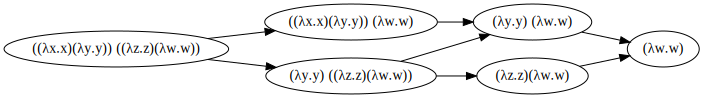

In [9]:
import IHaskell.Display.Graphviz
dot ( "digraph { rankdir=\"LR\"; "
  ++"\"((λx.x)(λy.y)) ((λz.z)(λw.w))\" -> \"((λx.x)(λy.y)) (λw.w)\";"
  ++"\"((λx.x)(λy.y)) ((λz.z)(λw.w))\" -> \"(λy.y) ((λz.z)(λw.w))\";"
  ++"\"(λy.y) ((λz.z)(λw.w))\" -> \"(λz.z)(λw.w)\" -> \"(λw.w)\";"
  ++"\"(λy.y) ((λz.z)(λw.w))\" -> \"(λy.y) (λw.w)\" -> \"(λw.w)\";"
  ++"\"((λx.x)(λy.y)) (λw.w)\" -> \"(λy.y) (λw.w)\";"
  ++"}" )

\section{TODO}
이게 무슨 이야기인가 테스트
이게 무슨 이야기인가 테스트
이게 무슨 이야기인가 테스트

In [10]:
let x1 = 5 in x1 + x1

10

In [11]:
let f1 = \x -> x * x in f1 7

49

In [12]:
f1 x1

: 

In [13]:
x2 = 5
x2 + x2

10

In [14]:
f2 = \x -> x * x
f2 7

49

In [15]:
f2 x2

25

In [16]:
f2 = \x -> x * x
f2'   x  = x * x 

In [17]:
f2  9
f2' 9

81

81

In [18]:
f3 = \x -> \y -> x + y
f3'   x  = \y -> x + y
f3''  x     y  = x + y

In [19]:
f3   4 5
f3'  4 5
f3'' 4 5

9

9

9

In [20]:
fu  x y  = y - x
fc (x,y) = y - x

In [21]:
fu  3 7
fc (3,7)

4

4

In [22]:
p1 = (3,7)
fc p1

4